In [0]:
#including required libraries

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import ModelCheckpoint

import numpy as np
import matplotlib.pyplot as plt

In [0]:
# downloading dataset

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images, test_labels) = fashion_mnist.load_data()

In [4]:
# viewing data

print(train_images.shape,train_labels.shape)   #viewing training dataset
print(test_images.shape,test_labels.shape)     # viewing testing dataset

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [5]:
# reshaping data

train_images = train_images.reshape(-1,28*28)
print(train_images.shape)

test_images = test_images.reshape(-1,28*28)
print(test_images.shape)

#rescaling data

train_images = train_images / 255.0
test_images = test_images / 255.0

#one hot-encoding labels

train_labels_cat= tf.keras.utils.to_categorical(train_labels)
train_labels_cat.shape

test_labels_cat = tf.keras.utils.to_categorical(test_labels)
test_labels_cat.shape

#creating validation dataset

train_images_valid, train_images = train_images[:10000],train_images[10000:]
train_labels_valid, train_labels_cat = train_labels_cat[:10000], train_labels_cat[10000:]
print(train_labels_cat.shape)
print(test_labels_cat.shape)

(60000, 784)
(10000, 784)
(50000, 10)
(10000, 10)


In [6]:
# creating model for dense neural network

main_model = tf.keras.Sequential()

main_model.add(tf.keras.layers.Dense(units=256, input_shape = (28*28,), activation=tf.nn.relu))  # 1st layer(input layer)
main_model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))                     # 2nd layer(1st hidden layer)
main_model.add(tf.keras.layers.Dense(units=10,activation = tf.nn.softmax))                    # 3rd layer(output layer/ 2nd hidden layer)

main_model.summary()

#compiling model

main_model.compile(optimizer ='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])   # compiling model using optimizer,a loss function, a last of metrics

# training model

history_main = main_model.fit(train_images,train_labels_cat, validation_data=(train_images_valid,train_labels_valid),batch_size=64, epochs = 40)

#evaluating the model

test_loss, test_acc = main_model.evaluate(test_images, test_labels_cat)
print("test accuracy:", test_acc)

W0617 02:56:36.649111 139927434352512 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 3s 58us/sample - loss: 0.5061 - acc: 0.8217 - val_loss: 0.3858 - val_acc: 0.8578
Epoch 2/40
50000/50000 [==============================] - 2s 48us/sample - loss: 0.3689 - acc: 0.8646 - val_loss: 0.3542 - val_acc: 0.8732
Epoch 3/40
50000/50000 [============================

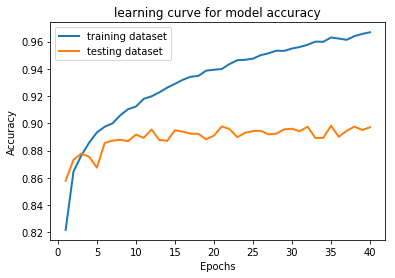

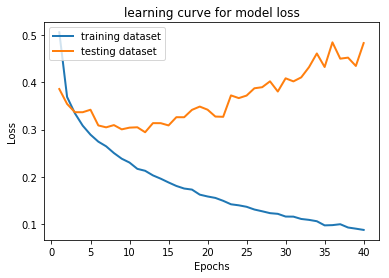

In [7]:
# learning curve

acc=history_main.history['acc']
val_acc=history_main.history['val_acc']
loss=history_main.history['loss']
val_loss=history_main.history['val_loss']
#print(history_main.history.keys)

#plotting graph for model accuracy
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,linewidth=2)
plt.plot(epochs,val_acc,linewidth=2)
plt.title('learning curve for model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training dataset', 'testing dataset'], loc='upper left')
plt.show()

#plotting graph for model loss
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss, linewidth=2)
plt.plot(epochs,val_loss, linewidth=2)
plt.title('learning curve for model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training dataset','testing dataset'], loc='upper left')
plt.show()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               200960    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/40
49344/50000 [============================>.] - ETA: 0

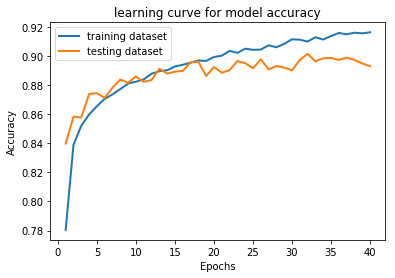

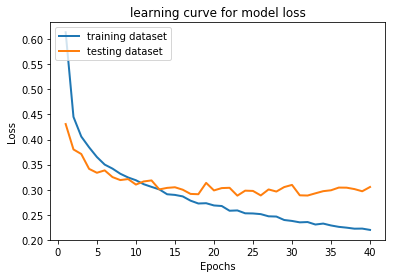

In [9]:
# dropout model

# creating model for dense neural network

Dropout_model = tf.keras.Sequential()

Dropout_model.add(tf.keras.layers.Dense(units=256, input_shape = (28*28,), activation=tf.nn.relu))  # 1st layer(input layer)
Dropout_model.add(tf.keras.layers.Dropout(0.3))
Dropout_model.add(tf.keras.layers.Dense(units=128, activation = tf.nn.relu))                     # 2nd layer(1st hidden layer)
Dropout_model.add(tf.keras.layers.Dropout(0.3))
Dropout_model.add(tf.keras.layers.Dense(units=10,activation = tf.nn.softmax))                    # 3rd layer(output layer/ 2nd hidden layer)

Dropout_model.summary()

#compiling model

Dropout_model.compile(optimizer ='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])   # compiling model using optimizer,a loss function, a last of metrics

Dropout_model.save('dropout_model.h5')
saved_model=load_model('dropout_model.h5') #loading model

#  adding checkpoint
filepath="dropout_model.h5"
mc=ModelCheckpoint(filepath,monitor='val_acc',mode='max',verbose=1,save_best_only=True)

# training model

history_Dropout = saved_model.fit(train_images,train_labels_cat, validation_data=(train_images_valid,train_labels_valid),batch_size=64, epochs = 40, callbacks=[mc])

#evaluating the model

test_loss, test_acc = saved_model.evaluate(test_images, test_labels_cat)
print("test accuracy:", test_acc)

# learning curve

acc=history_Dropout.history['acc']
val_acc=history_Dropout.history['val_acc']
loss=history_Dropout.history['loss']
val_loss=history_Dropout.history['val_loss']
#print(history_main.history.keys)

#plotting graph for model accuracy
epochs=range(1,len(acc)+1)
plt.plot(epochs,acc,linewidth=2)
plt.plot(epochs,val_acc,linewidth=2)
plt.title('learning curve for model accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['training dataset', 'testing dataset'], loc='upper left')
plt.show()

#plotting graph for model loss
epochs=range(1,len(loss)+1)
plt.plot(epochs,loss, linewidth=2)
plt.plot(epochs,val_loss, linewidth=2)
plt.title('learning curve for model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['training dataset','testing dataset'], loc='upper left')
plt.show()